# Read and process meteo bulletins of type VRXA00

1. Read file as text and print its content
2. Read file into a Polars dataframe

In [1]:
file_path = "data/meteo/VRXA00.202310190530"
print(file_path)


data/meteo/VRXA00.202310190530


In [2]:
# Read file as text and print content
with open(file=file_path) as fh:
    file_content = fh.readlines()

print(file_content)

['16082\n', 'VRXA00 LSSW 190530\n', '\n', 'iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0\n', '187 202310190530 007.3 098.6 0662.9 003.4 329.6 00000.00 006.8 100.0 0662.7 003.9 008.6 00000.00 004.8 283.9 7.770 99.320\n']


In [3]:
header = file_content[3]
print(header)

iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0



In [4]:
header_list = header.split()
print("list of header elements:", header_list)

list of header elements: ['iii', 'zzzztttt', 'tre200s0', 'uor200s0', 'prestas0', 'fa1010z0', 'da1010z0', 'rre150z0', 'ta1200s0', 'ua1200s0', 'pa1stas0', 'fkl010z0', 'dkl010z0', 'ra1150z0', 'fkl010z1', 'gor000z0', 'ta2200s0', 'ua2200s0']


Assignment:
1. Extract the header element for temperature (tre200s0).
2. Extract the corresponding temperature reading.
3. Print the result as follows: _tre200s = 007.3 °C_

In [5]:
header_temp=file_content[3].split()[2]
print(header_temp)

tre200s0


In [6]:
values=file_content[4].split()
print(values)

['187', '202310190530', '007.3', '098.6', '0662.9', '003.4', '329.6', '00000.00', '006.8', '100.0', '0662.7', '003.9', '008.6', '00000.00', '004.8', '283.9', '7.770', '99.320']


In [7]:
temp=values[2]
print(header_temp, ":", temp)

tre200s0 : 007.3


Investigate some properties of the value variable.
Convert to float, int

In [8]:
value=file_content[4].split()[2]
print("value:", value)
print("type of value:", type(value))

print("value as floating point number:", float(value))
print("type of the rounded floating point value:", type(round(float(value))))


value: 007.3
type of value: <class 'str'>
value as floating point number: 7.3
type of the rounded floating point value: <class 'int'>


Loops and conditions

In [9]:
a = 1

for i in range(10):
    a = a + i
    if a < 20:
        print(i, ":", a)
    else:
        print(i, ":", "a is too big")

0 : 1
1 : 2
2 : 4
3 : 7
4 : 11
5 : 16
6 : a is too big
7 : a is too big
8 : a is too big
9 : a is too big


**Read files from a folder, exclude unwanted files. Extract and information in lists.**

1st iteration

In [10]:
import os
path = "data/meteo"

files = os.listdir(path)

for file in files:
    if ".zip" in file:
        continue
    else:
        print(file)


VRXA00.202310190000
VRXA00.202310190530
VRXA00.202310190540
VRXA00.202401111520
VRXA00.202401111540
VRXA00.202310190610
VRXA00.202310190650
VRXA00.202310190640
VRXA00.202401111530
VRXA00.202310190600
VRXA00.202310190520
VRXA00.202310190630
VRXA00.202310190700


2nd iteration

In [11]:
import os
path = "data/meteo"

files = os.listdir(path)

for file in files:
    if ".zip" in file:
        continue
    else:
        # Read file as text, extract temperature and print value
        with open(file=os.path.join(path, file)) as fh:
            file_content = fh.readlines()

        temp = file_content[4].split()[2]
        print(file, "temp=", temp)


VRXA00.202310190000 temp= 005.1
VRXA00.202310190530 temp= 007.3
VRXA00.202310190540 temp= 007.0
VRXA00.202401111520 temp= /
VRXA00.202401111540 temp= /
VRXA00.202310190610 temp= 008.6
VRXA00.202310190650 temp= 008.5
VRXA00.202310190640 temp= 008.1
VRXA00.202401111530 temp= /
VRXA00.202310190600 temp= 007.8
VRXA00.202310190520 temp= /
VRXA00.202310190630 temp= 008.0
VRXA00.202310190700 temp= 008.6


3rd iteration: extract temperatures

In [ ]:
import os
path = "data/meteo"

files = os.listdir(path)

temperatures = list()

for file in files:
    if ".zip" in file:
        continue
    else:
        # Read file as text, extract temperature and print value
        with open(file=os.path.join(path, file)) as fh:
            file_content = fh.readlines()

        temp = file_content[4].split()[2]

        # append value to list
        temperatures.append(temp)

print(temperatures)


['005.1', '007.3', '007.0', '/', '/', '008.6', '008.5', '008.1', '/', '007.8', '/', '008.0', '008.6']


4th iteration: extract datetimes and temperatures

In [13]:
import os
path = "data/meteo"

datetimes = list()
temperatures = list()

# list all files in path
files = os.listdir(path)

for file in files:
    if ".zip" in file:
        continue
    else:
        # datetime = file.split(sep=".")[1]
        datetime = file.replace("VRXA00.", "")
        datetimes.append(datetime)

        # Read file as text, extract temperature and print value
        with open(file=os.path.join(path, file)) as fh:
            file_content = fh.readlines()

        temperature = file_content[4].split()[2]
        temperatures.append(temperature)

print(datetimes)
print(temperatures)


['202310190000', '202310190530', '202310190540', '202401111520', '202401111540', '202310190610', '202310190650', '202310190640', '202401111530', '202310190600', '202310190520', '202310190630', '202310190700']
['005.1', '007.3', '007.0', '/', '/', '008.6', '008.5', '008.1', '/', '007.8', '/', '008.0', '008.6']


5th iteration: convert to proper datetimes, transform missing temperature readings

In [14]:
import os
path = "data/meteo"

datetimes = list()
temperatures = list()

# list all files in path
files = os.listdir(path)

for file in files:
    if ".zip" in file:
        continue
    else:
        # datetime = file.split(sep=".")[1]
        datetime = file.replace("VRXA00.", "")
        datetimes.append(datetime)

        # Read file as text and print content
        with open(file=os.path.join(path, file)) as fh:
            file_content = fh.readlines()

        temperature = file_content[4].split()[2]
        try:
            temperature = float(temperature)
        except:
            temperature = None
        temperatures.append(temperature)

print(datetimes)
print(temperatures)


['202310190000', '202310190530', '202310190540', '202401111520', '202401111540', '202310190610', '202310190650', '202310190640', '202401111530', '202310190600', '202310190520', '202310190630', '202310190700']
[5.1, 7.3, 7.0, None, None, 8.6, 8.5, 8.1, None, 7.8, None, 8.0, 8.6]


Convert datetimes into proper date/time stamps

In [ ]:
from datetime import datetime, timezone

datetimes_utc = [
    datetime.strptime(ds, "%Y%m%d%H%M").replace(tzinfo=timezone.utc)
    for ds in datetimes
]
print(datetimes_utc)


[datetime.datetime(2023, 10, 19, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 20, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 10, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 50, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 20, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 7, 0, tzinfo=datetime.timezone.utc)]


Read lists into a Polars DataFrame for plotting

In [16]:
import polars as pl
df = pl.DataFrame(zip(datetimes_utc, temperatures))
df.columns=["dtm", "T"]
df = df.sort("dtm")
df

dtm,T
"datetime[μs, UTC]",f64
2023-10-19 00:00:00 UTC,5.1
2023-10-19 05:20:00 UTC,null
2023-10-19 05:30:00 UTC,7.3
2023-10-19 05:40:00 UTC,7.0
2023-10-19 06:00:00 UTC,7.8
…,…
2023-10-19 06:50:00 UTC,8.5
2023-10-19 07:00:00 UTC,8.6
2024-01-11 15:20:00 UTC,null


In [17]:
df.plot.point(x="dtm", y="T")

alt.Chart(...)

Using matplotlib backend: widget


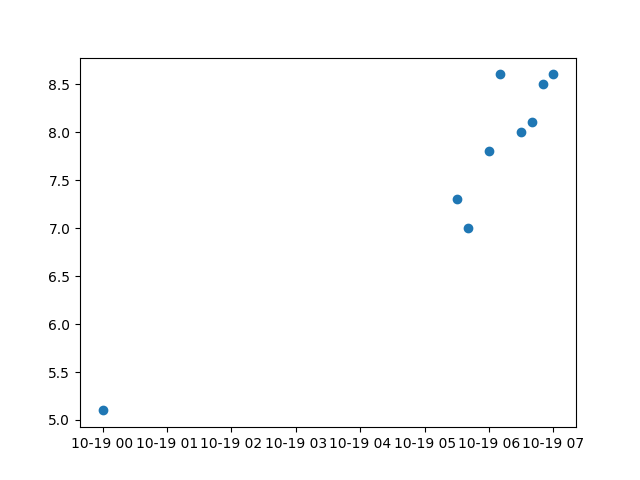

In [25]:
%matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(df["dtm"], df["T"])
